In [1]:
import numpy as np
import pandas as pd
  
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV ,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold ,cross_val_score
#import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [2]:
# Import air quality
df_airquality = pd.read_csv('airquality.csv',usecols = ['Ozone','Solar.R','Wind','Temp'])
df_airquality.head()


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56


**Adding 'TWcp'Column and 'TWrat' Column to the df_airquality**

In [3]:
df_airquality['TWcp'] = np.round(df_airquality['Temp']* df_airquality['Wind'],2)
df_airquality['TWrat'] = np.round(df_airquality['Temp']/ df_airquality['Wind'],2)

df_airquality = df_airquality.dropna()

df_airquality.isna().any()


Ozone      False
Solar.R    False
Wind       False
Temp       False
TWcp       False
TWrat      False
dtype: bool

In [4]:
df_airquality.head()


,Ozone,Solar.R,Wind,Temp,TWcp,TWrat
0,41.0,190.0,7.4,67,495.8,9.05
1,36.0,118.0,8.0,72,576.0,9.00
2,12.0,149.0,12.6,74,932.4,5.87
3,18.0,313.0,11.5,62,713.0,5.39
6,23.0,299.0,8.6,65,559.0,7.56


# Ridge Regression or L2 Regularization



### Data and Setup

In [5]:
X = df_airquality.drop('Ozone',axis=1)
y = df_airquality[['Ozone']]
X.head()

,Solar.R,Wind,Temp,TWcp,TWrat
0,190.0,7.4,67,495.8,9.05
1,118.0,8.0,72,576.0,9.00
2,149.0,12.6,74,932.4,5.87
3,313.0,11.5,62,713.0,5.39
6,299.0,8.6,65,559.0,7.56


# Train | Test Split

In [6]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Scaling the Data

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

# Scaling X_tran and X_test

In [8]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## 1-a )Answering Choosing an alpha value with Cross-Validation through RidgeCV 

In [9]:
CV10 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)

ridge_cv_model = RidgeCV(alphas=np.arange(0, 100, 0.05), cv=CV10, scoring='neg_mean_squared_error')
ridge_cv_model.fit(X_train,y_train)


RidgeCV(alphas=array([0.000e+00, 5.000e-02, 1.000e-01, ..., 9.985e+01, 9.990e+01,
       9.995e+01]),
        cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=1),
        scoring='neg_mean_squared_error')

In [10]:
print('alpha is :\n ' ,np.round(ridge_cv_model.alpha_,2),'\n' ,50*"-")


alpha is :
  9.85 
 --------------------------------------------------


## 1-b )Answering:


In [11]:
print('coefs are :')
ridge_cv_model.coef_


coefs are :


array([[ 6.33886605, -2.14576374, 12.6012792 , -1.92722447, 11.15683668]])

# least_squares_model

In [12]:
least_squares_model = LinearRegression().fit(X_train,y_train)
print('least_squares_model.coef_ are :')

least_squares_model.coef_


least_squares_model.coef_ are :


array([[  7.34044591,  33.06460397,  27.99188372, -34.86860967,
          7.31588348]])

In [13]:
my_dict = {'ridge_cv_model_coef':ridge_cv_model.coef_.reshape(-1),'least_squares_model_coef': least_squares_model.coef_.reshape(-1)}
df_compare = pd.DataFrame(my_dict,index = [1,2,3,4,5])
np.round(df_compare,2)


,ridge_cv_model_coef,least_squares_model_coef
1,6.34,7.34
2,-2.15,33.06
3,12.60,27.99
4,-1.93,-34.87
5,11.16,7.32


In [14]:
df_ridge_smaller = df_compare[df_compare['ridge_cv_model_coef']< df_compare['least_squares_model_coef']]
df_ridge_smaller


,ridge_cv_model_coef,least_squares_model_coef
1,6.338866,7.340446
2,-2.145764,33.064604
3,12.601279,27.991884


In [15]:
df_ridge_bigger = df_compare[df_compare['ridge_cv_model_coef']> df_compare['least_squares_model_coef']]
df_ridge_bigger


,ridge_cv_model_coef,least_squares_model_coef
4,-1.927224,-34.868610
5,11.156837,7.315883


# 1-b Answeing report:

## According to upper Dataframes result ,there aren't all ridge estimates smaller than least 

## squares, feature 1,feature 2 and feature 3 in ridge model are smaller but  4th and 5th featire  

## in ridge model are larger than least squares

# 2- LASSO Regression or L1 Regularization 

In [16]:
CV10 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
LASSO_cv_model = LassoCV(alphas=np.arange(0.001, 100, 0.05), cv=CV10,  max_iter = 100000)


In [17]:
LASSO_cv_model.fit(X_train,y_train)


C:\Users\mzand\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(alphas=array([1.0000e-03, 5.1000e-02, 1.0100e-01, ..., 9.9851e+01, 9.9901e+01,
       9.9951e+01]),
        cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=1),
        max_iter=100000)

In [20]:
print('alpha is :\n ' ,np.round(LASSO_cv_model.alpha_,3))


alpha is :
  1.101


## Note: in this Assignment GridSearchCV has been used to calculate 1SE alpha

In [21]:
CV10 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
param_grid = {'alpha': np.arange(0.001, 100, 0.05), 'max_iter': [100000]}
lasso_gcv = GridSearchCV(Lasso(), param_grid= param_grid, cv= CV10, scoring= 'neg_mean_squared_error', n_jobs= -1)


In [22]:
lasso_gcv.fit(X_train, y_train)


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=10, random_state=1),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.0000e-03, 5.1000e-02, 1.0100e-01, ..., 9.9851e+01, 9.9901e+01,
       9.9951e+01]),
                         'max_iter': [100000]},
             scoring='neg_mean_squared_error')

In [23]:
lasso_gcv.best_estimator_


Lasso(alpha=1.101, max_iter=100000)

In [24]:
lasso_gcv.best_score_ , lasso_gcv.score(X_train, y_train)


(-491.7989480146936, -409.7023805412343)

In [25]:
lasso_gcv.cv_results_.keys()


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'param_max_iter', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [26]:
#  As the negative mean_squared_errors were reported the max is the best
lasso_gcv.cv_results_.get('mean_test_score').max()


-491.7989480146936

In [27]:
# here I create a dataframe from alphas and Mean Squared errors(MSE), next I calculate the std of MSEs and 
# add the std to the best MSE. Next i find the nearest MSE in dataframe and the related alpha in that row.

# here the best alpha is 1.101 and MSE is 491 in the first row. when I added 1 std (226.82) to best MSE, 
# result = 718.62. The nearest MSE to 718 is 718.18 in 237th row and the related alpha is 11.801


df_lasso = pd.DataFrame({'alpha': lasso_gcv.cv_results_.get('param_alpha'), 
                         'Mean_Score':-lasso_gcv.cv_results_.get('mean_test_score')},
                        index= lasso_gcv.cv_results_.get('rank_test_score'))
df_lasso.sort_index(inplace= True)


In [28]:
df_lasso.head()


,alpha,Mean_Score
1,1.101,491.798948
2,1.151,491.806387
3,1.051,491.808456
4,1.201,491.830773
5,1.001,491.834911


In [29]:
# calculate the std of MSEs
df_lasso.Mean_Score.std()


226.82283266522086

In [30]:
# add the std to the best MSE
se_1 = df_lasso.iloc[0, 1] + df_lasso.Mean_Score.std()
se_1


718.6217806799145

In [31]:
se_1_df = df_lasso[(df_lasso.Mean_Score <= se_1)]
se_1_df.tail()


,alpha,Mean_Score
233,11.601,710.681866
234,11.651,712.543973
235,11.701,714.414944
236,11.751,716.294775
237,11.801,718.183468


In [32]:
alpha_1se = se_1_df.iloc[-1,0]
print("alpha_1se is :\n\n",alpha_1se,'\n',30*"---")


alpha_1se is :

 11.801 
 ------------------------------------------------------------------------------------------


# 2-a) Reporting alphas:

## According to upper calculation alpha is 1.101 and alpha_1se is 11.801

### Report parameters for each alphas in LASSO fit

In [33]:
LASSO_ALPHA = Lasso(alpha=1.101)

LASSO_ALPHA_1se = Lasso(alpha=11.801)


In [34]:
LASSO_ALPHA.fit(X_train,y_train)

LASSO_ALPHA_1se.fit(X_train,y_train)


Lasso(alpha=11.801)

In [35]:
zip_list_ALPHA_1se = zip(list(X.columns), np.round(list(LASSO_ALPHA_1se.coef_),2))
print('Coefficients in ALPHA 1se are:','\n\n',list(zip_list_ALPHA_1se))


Coefficients in ALPHA 1se are: 

 [('Solar.R', 0.0), ('Wind', -0.0), ('Temp', 8.49), ('TWcp', -0.0), ('TWrat', 7.31)]


In [36]:
zip_list_ALPHA = zip(list(X.columns), np.round(list(LASSO_ALPHA.coef_),2))
print('Coefficients in Minimum ALPHA are::','\n\n',list(zip_list_ALPHA))


Coefficients in Minimum ALPHA are:: 

 [('Solar.R', 5.73), ('Wind', -0.0), ('Temp', 13.3), ('TWcp', -1.61), ('TWrat', 13.03)]


### 2-b Answer: Based on the result of LASSO for alpha and alpha1_se, two features heve been selected in 

### alpha1_se('Temp' , 'TWrat') but for alpha 4 features have been selected('Solar.R', 'Temp' , 'TWcp' ,'TWrat').It 

### seems the alpha_1SE LASSO Model is more flexible than alpha LASSO Model




# c)compare variables 

**The variables selected in Hybrid model were ('Solar.R', 'Wind', 'Temp', 'TWcp') and the selected variables in** 

**Lasso are ('Solar.R', 'Temp' , 'TWcp' ,'TWrat') and ('Temp' , 'TWrat') in Lasso 1se.**

**The variable Temp is common in three models and Solar.R, Temp and TWcp are selected in both Lasso and Hybrid.**

# 3)Answaring:

## Train | Test Split

In [37]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2928893)


## Scaling the Data

In [38]:
scaler = StandardScaler().fit(X_train)


## Scaling X_tran and X_test

In [39]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [40]:
#Dictionary of alphas will be made according to a previouse reporets 
alphas_dict = {'LASSO_min':1.101 ,'LASSO_1SE':11.801 ,'Ridge_alpha':9.85}


### Ridge model

In [41]:
CV10 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=2928893)


In [42]:
# 3-c

ridge_cv = cross_val_score(Ridge(max_iter= 100000), 
                           X_train, y_train, cv= CV10, scoring= 'neg_mean_squared_error')
print('Best MSE of Ridge: {:.2f}'.format(-ridge_cv.max()))

Best MSE of Ridge: 177.05


### LASSO_min

In [43]:
# 3-c

lasso_cv_min = cross_val_score(Lasso(alpha= 1.101, max_iter= 1000000), 
                               X_train, y_train, cv= CV10, scoring = 'neg_mean_squared_error')
print('Best MSE of Lasso, alpha_min: {:.2f}'.format(-lasso_cv_min.max()))

Best MSE of Lasso, alpha_min: 174.62


### LASSO_1SE

In [44]:
# 3-c

lasso_cv_1se = cross_val_score(Lasso(alpha= 11.801, max_iter= 1000000), 
                               X_train, y_train, cv= CV10, scoring = 'neg_mean_squared_error')
print('Best MSE of Lasso, alpha_1se: {:.2f}'.format(-lasso_cv_1se.max()))

Best MSE of Lasso, alpha_1se: 285.49


## 3ii) Reporting MSPE based in best model has been selected

### (using test part of dataset)

In [46]:
# The best model is Lasso with Minimum alpha (1.101): lasso_cv_min

lasso_model = Lasso(alpha= 1.101, max_iter= 1000000).fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

MSE_lasso = mean_squared_error(y_test,y_pred)

print('The Best Model MSE is : {:.2f} '.format(MSE_lasso))

The Best Model MSE is : 454.10 


## 3d) Report MSEPs for each fold 

In [47]:
df_result_lasso1 = pd.DataFrame({'Lasso_Min': -lasso_cv_min}, index = range(1,11))
df_result_lasso1['Lasso_1se'] = -lasso_cv_1se
df_result_lasso1['Ridge'] = -ridge_cv
df_result_lasso1


,Lasso_Min,Lasso_1se,Ridge
1,174.624645,285.493075,194.307798
2,492.149188,480.165237,498.094121
3,611.015584,346.401177,951.627918
4,245.204244,376.714419,231.714289
5,181.054778,325.991152,177.049667
6,625.917213,916.320550,608.808802
7,286.406773,463.492302,267.102513
8,671.020599,1043.007662,640.479788
9,660.394624,798.035795,675.594730
10,409.906952,726.425251,360.881799


In [48]:
print('The MSE for Full data is :\n\n', np.round((df_result_lasso1.mean()), 2))


The MSE for Full data is :

 Lasso_Min    435.77
Lasso_1se    576.20
Ridge        460.57
dtype: float64


# Report MSEPs for each fold based in LinerRegression

**Liner regression for 10cv error with features such as Lasso_min:**

**[Solar.R ,  Temp ,	 TWcp  	,TWrat]**


In [49]:
df_X_train =pd.DataFrame(X_train,columns = ['Solar.R','Wind','Temp','TWcp','TWrat']) 
df_X_train.head(5)


,Solar.R,Wind,Temp,TWcp,TWrat
0,-1.789236,0.313920,-0.693883,0.140100,-0.553468
1,1.364247,0.480431,-1.623981,-0.112941,-0.755778
2,0.938690,0.147409,0.442904,0.433861,-0.291548
3,0.043930,0.480431,0.856281,1.033849,-0.378252
4,0.000283,-0.962665,1.683035,-0.614870,0.965665


## LinearRegression()

In [50]:
Liner_regression_cv = cross_val_score(LinearRegression(), df_X_train[['Solar.R','Temp','TWcp','TWrat']],
                                      y_train , scoring= 'neg_mean_squared_error', cv= CV10)


In [51]:
df_result_lasso1['LinearReg'] = -Liner_regression_cv

# Data of Hybrid model copied from previouse assignment : score_cv_hybrid_model4 
df_result_lasso1['Hybrid']= [197.91512069, 286.71196058, 999.48957935, 242.20370119, 331.31510107, \
                             499.69237293, 939.32094704, 152.45742361, 261.18336512, 165.89271419]

df_result_lasso1

,Lasso_Min,Lasso_1se,Ridge,LinearReg,Hybrid
1,174.624645,285.493075,194.307798,191.027993,197.915121
2,492.149188,480.165237,498.094121,522.982040,286.711961
3,611.015584,346.401177,951.627918,1329.583923,999.489579
4,245.204244,376.714419,231.714289,246.757220,242.203701
5,181.054778,325.991152,177.049667,169.649796,331.315101
6,625.917213,916.320550,608.808802,610.961963,499.692373
7,286.406773,463.492302,267.102513,271.238607,939.320947
8,671.020599,1043.007662,640.479788,650.387317,152.457424
9,660.394624,798.035795,675.594730,705.196805,261.183365
10,409.906952,726.425251,360.881799,371.298948,165.892714


## MSPE box plots

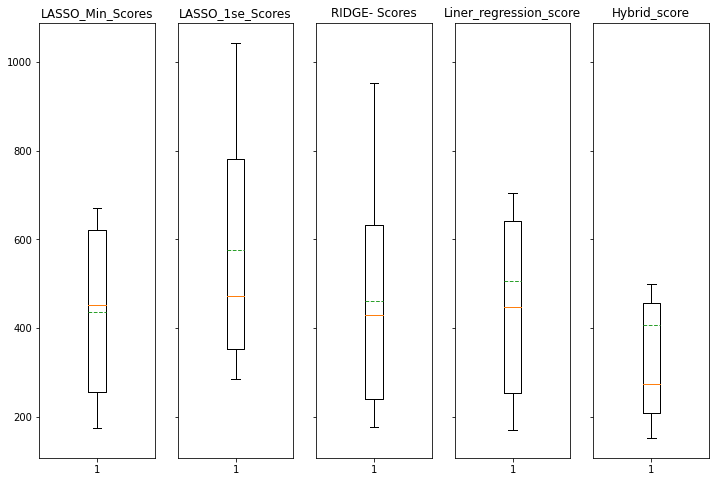

In [52]:
fig1, ax1 = plt.subplots(1,5, sharey= True, figsize=(12,8))

ax1[0].boxplot(df_result_lasso1.Lasso_Min, meanline= True, showmeans= True)

ax1[1].boxplot(df_result_lasso1.Lasso_1se, meanline= True, showmeans= True)

ax1[2].boxplot(df_result_lasso1.Ridge, meanline= True, showmeans= True)

ax1[3].boxplot(df_result_lasso1.LinearReg, meanline= True, showmeans= True, sym='')

ax1[4].boxplot(df_result_lasso1.Hybrid, meanline= True, showmeans= True, sym='')


ax1[0].set_title('LASSO_Min_Scores')
ax1[1].set_title('LASSO_1se_Scores')
ax1[2].set_title('RIDGE- Scores')
ax1[3].set_title('Liner_regression_score')
ax1[4].set_title('Hybrid_score')

plt.show()

### The best model:
**It seems that the feature selection on Hybrid model is the best model. the next best one is Lasso based on minimum alpha**

## RMSPE box plots

In [53]:
min_df = df_result_lasso1.min().min()

In [54]:
min_df = df_result_lasso1.min().min()
lasso_r_mse = df_result_lasso1/ min_df
lasso_r_mse


,Lasso_Min,Lasso_1se,Ridge,LinearReg,Hybrid
1,1.145399,1.872609,1.274505,1.252992,1.298167
2,3.228109,3.149504,3.267103,3.430348,1.880603
3,4.007778,2.272117,6.241926,8.721018,6.555860
4,1.608346,2.470948,1.519862,1.618532,1.588665
5,1.187576,2.138244,1.161306,1.112768,2.173165
6,4.105521,6.010337,3.993304,4.007427,3.277586
7,1.878602,3.040143,1.751981,1.779111,6.161202
8,4.401364,6.841305,4.201040,4.266026,1.000000
9,4.331666,5.234483,4.431367,4.625533,1.713156
10,2.688665,4.764775,2.367099,2.435427,1.088125


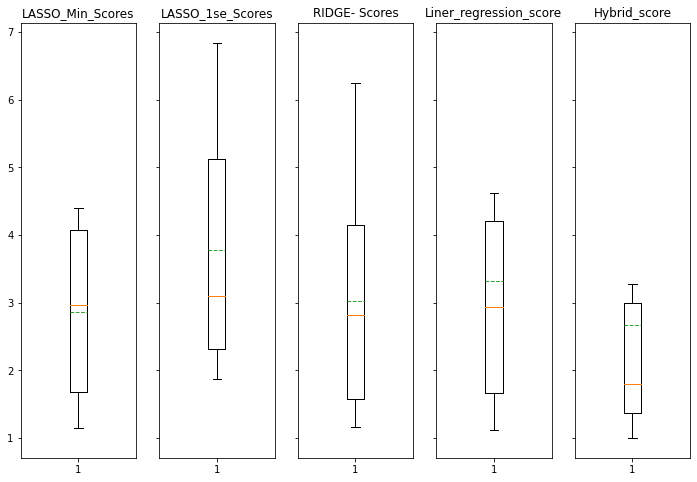

In [55]:
fig2, ax2 = plt.subplots(1,5, sharey= True, figsize=(12,8))

ax2[0].boxplot(lasso_r_mse.Lasso_Min, meanline= True, showmeans= True)

ax2[1].boxplot(lasso_r_mse.Lasso_1se, meanline= True, showmeans= True)

ax2[2].boxplot(lasso_r_mse.Ridge, meanline= True, showmeans= True)

ax2[3].boxplot(lasso_r_mse.LinearReg, meanline= True, showmeans= True, sym='')

ax2[4].boxplot(lasso_r_mse.Hybrid, meanline= True, showmeans= True, sym='')


ax2[0].set_title('LASSO_Min_Scores')
ax2[1].set_title('LASSO_1se_Scores')
ax2[2].set_title('RIDGE- Scores')
ax2[3].set_title('Liner_regression_score')
ax2[4].set_title('Hybrid_score')

plt.show()